In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [30]:
oimg = cv2.imread(r"E:\iris\CASIA-IrisV1\CASIA Iris Image Database (version 1.0)\060\2\060_2_2.bmp",0)
img = cv2.medianBlur(oimg,5)
cimg=cv2.cvtColor(oimg,cv2.COLOR_GRAY2BGR)

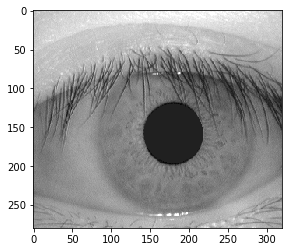

In [31]:
plt.imshow(oimg,cmap="gray")
circles=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.65,100,param1=200)

In [32]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,255,255),-1)
    # draw the center of the circle



In [33]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),105,(0,255,0),2)
    # draw the center of the circle

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
height,width=oimg.shape

In [10]:
mask=np.zeros((height,width),np.uint8)

In [11]:
circles=circles.reshape(3,-1)

In [12]:
cv2.circle(mask,(circles[0],circles[1]),105,(255,255,255),-1)
cv2.imshow('detected circles',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
masked_data = cv2.bitwise_and(oimg,oimg, mask=mask)

In [14]:
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

In [15]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(contours[0])

# Crop masked_data
crop = masked_data[y:y+h,x:x+w]

#Code to close Window
cv2.imshow('Cropped Eye',crop)
cv2.imshow('original',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cropped_circles=cv2.HoughCircles(crop,cv2.HOUGH_GRADIENT,1.5,100,param1=200)
temp=crop
cropped_circles=cropped_circles.reshape(3,-1)

In [17]:
halfimg1=crop[:105,:105]
halfimg2=crop[106:211,:105]
halfimg3=crop[:105,106:211]
halfimg4=crop[106:211,106:211]
halfimg2.shape

(105, 105)

In [18]:
cv2.imshow('Cropped part1',halfimg1)
cv2.imshow('Cropped part2',halfimg2)
cv2.imshow('Cropped part3',halfimg3)
cv2.imshow('Cropped part4',halfimg4)
cv2.imshow('original',crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [705]:
print(halfimg1.shape,halfimg2.shape,halfimg3.shape,halfimg4.shape)

(105, 105) (95, 105) (105, 105) (95, 105)


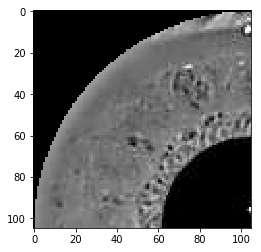

In [706]:
plt.imshow(halfimg1,cmap="gray")

In [707]:
i=0
j=0
newimg=np.zeros((105,105))
newimg1=np.zeros((105,105))

In [708]:
for i in range(105):
    for j in range(i,105):
        newimg[i][j]=halfimg1[i][j]
    for k in range(i):
        newimg1[i][k]=halfimg1[i][k]

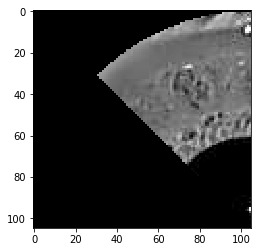

In [709]:
plt.imshow(newimg,cmap="gray")

In [710]:
newimg=newimg[:85,20:105]

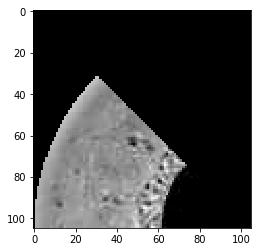

In [711]:
plt.imshow(newimg1,cmap="gray")


In [712]:
newimg1=newimg1[30:105,:80]

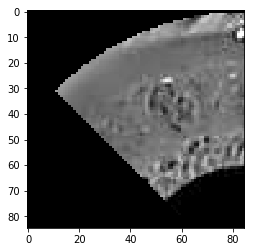

In [713]:
plt.imshow(newimg,cmap="gray")

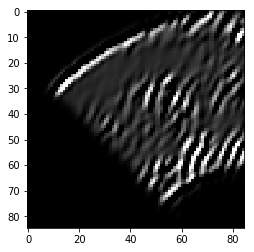

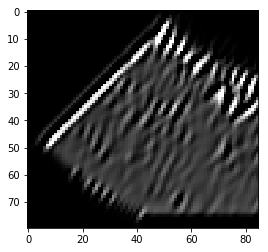

In [714]:
ksize=31

kernel=cv2.getGaborKernel((ksize, ksize),1.8,np.pi/6,4,1, 0, ktype=cv2.CV_32F)
accum = np.zeros_like(newimg1)
fimg = cv2.filter2D(newimg, cv2.CV_8UC3, kernel)
fimg1 = cv2.filter2D(newimg1, cv2.CV_8UC3, kernel)
plt.imshow(fimg,cmap="gray")
plt.show()
plt.imshow(fimg2,cmap="gray")
plt.show()

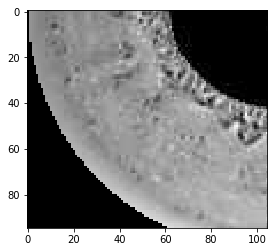

In [715]:
plt.imshow(halfimg2,cmap="gray")

In [716]:
newimg2=np.zeros((105,105))
newimg3=np.zeros((105,105))
for i in range(95):
    for j in range(105):
        if (i+j>=95):
            newimg2[i][j]=halfimg2[i][j]
        else:
            newimg3[i][j]=halfimg2[i][j]



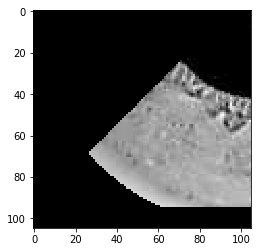

In [717]:
plt.imshow(newimg2,cmap="gray")
plt.show()
newimg3=newimg3[:75,:80]
newimg2=newimg2[20:100,20:]

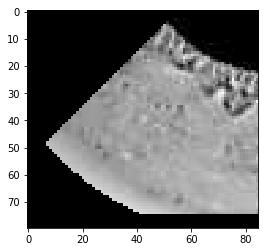

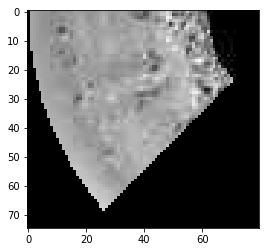

In [718]:
plt.imshow(newimg2,cmap="gray")
plt.show()
plt.imshow(newimg3,cmap="gray")



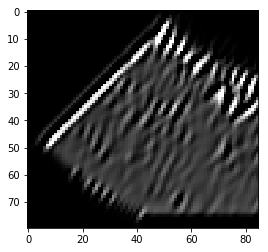

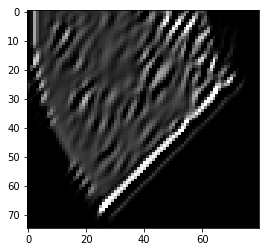

In [719]:
ksize=31

kernel=cv2.getGaborKernel((ksize, ksize),1.8,np.pi/6,4,1, 0, ktype=cv2.CV_32F)
accum = np.zeros_like(newimg1)
fimg2 = cv2.filter2D(newimg2, cv2.CV_8UC3, kernel)
fimg3 = cv2.filter2D(newimg3, cv2.CV_8UC3, kernel)
plt.imshow(fimg2,cmap="gray")
plt.show()
plt.imshow(fimg3,cmap="gray")
plt.show()

(105, 105)

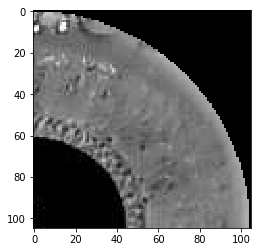

In [720]:
plt.imshow(halfimg3,cmap="gray")
halfimg3.shape

In [721]:
newimg4=np.zeros((105,105))
newimg5=np.zeros((105,105))
for i in range(95):
    for j in range(105):
        if (i+j>=105):
            newimg4[i][j]=halfimg3[i][j]
        else:
            newimg5[i][j]=halfimg3[i][j]


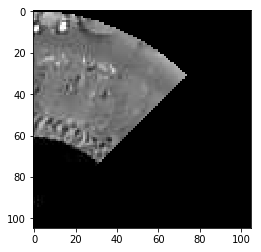

In [722]:
plt.imshow(newimg5,cmap="gray")

In [723]:
newimg4=newimg4[30:,30:]

In [724]:
newimg5=newimg5[:80,:80]

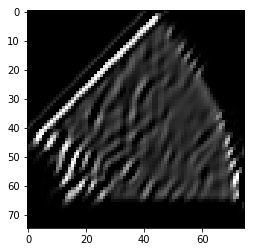

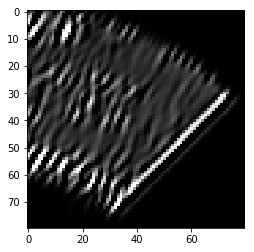

In [725]:
ksize=31

kernel=cv2.getGaborKernel((ksize, ksize),1.8,np.pi/6,4,1, 0, ktype=cv2.CV_32F)
accum = np.zeros_like(newimg1)
fimg4 = cv2.filter2D(newimg4, cv2.CV_8UC3, kernel)
fimg5 = cv2.filter2D(newimg5, cv2.CV_8UC3, kernel)
plt.imshow(fimg4,cmap="gray")
plt.show()
plt.imshow(fimg5,cmap="gray")
plt.show()

In [726]:
newimg6=np.zeros((105,105))
newimg7=np.zeros((105,105))
for i in range(95):
    for j in range(i,105):
        newimg6[i][j]=halfimg4[i][j]
    for k in range(i):
        newimg7[i][k]=halfimg4[i][k]


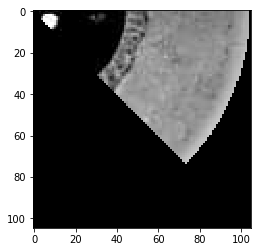

In [727]:
plt.imshow(newimg6,cmap="gray")
newimg6=newimg6[:80,25:]

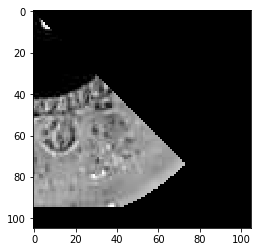

In [728]:
plt.imshow(newimg7,cmap="gray")
newimg7=newimg7[35:,:80]

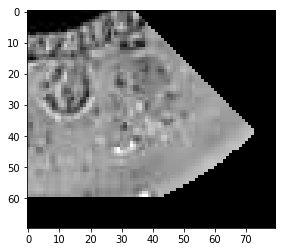

In [729]:
plt.imshow(newimg7,cmap="gray")


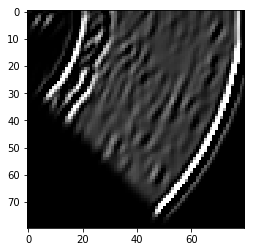

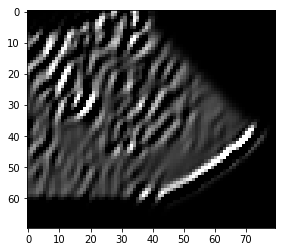

In [738]:
ksize=31

kernel=cv2.getGaborKernel((ksize, ksize),1.8,np.pi/6,4,1, 0, ktype=cv2.CV_32F)
accum = np.zeros_like(newimg1)
fimg6 = cv2.filter2D(newimg6, cv2.CV_8UC3, kernel)
fimg7 = cv2.filter2D(newimg7, cv2.CV_8UC3, kernel)
plt.imshow(fimg6,cmap="gray")
plt.show()
plt.imshow(fimg7,cmap="gray")
plt.show()

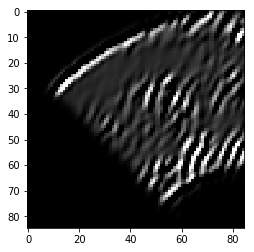

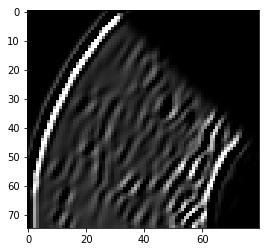

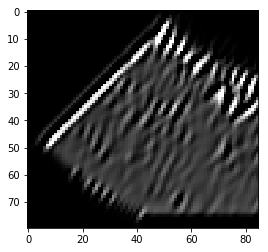

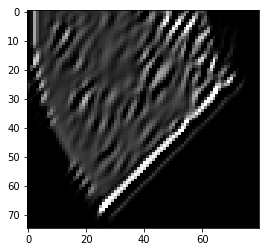

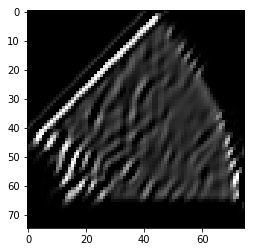

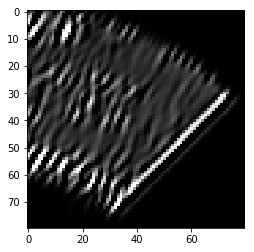

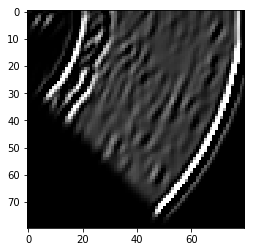

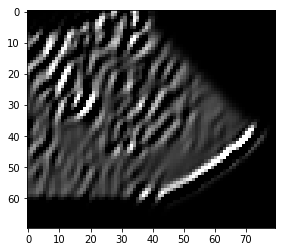

In [731]:
plt.imshow(fimg,cmap="gray")
plt.show()
plt.imshow(fimg1,cmap="gray")
plt.show()
plt.imshow(fimg2,cmap="gray")
plt.show()
plt.imshow(fimg3,cmap="gray")
plt.show()
plt.imshow(fimg4,cmap="gray")
plt.show()
plt.imshow(fimg5,cmap="gray")
plt.show()
plt.imshow(fimg6,cmap="gray")
plt.show()
plt.imshow(fimg7,cmap="gray")
plt.show()

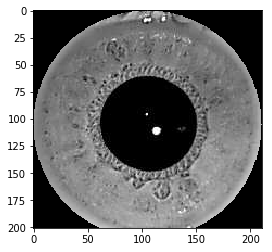

In [732]:
final_images=[]
plt.imshow(crop,cmap="gray")

In [733]:
final_images.append(fimg)
final_images.append(fimg1)
final_images.append(fimg2)
final_images.append(fimg3)
final_images.append(fimg4)
final_images.append(fimg5)
final_images.append(fimg6)
final_images.append(fimg7)

In [734]:
u=crop.sum()/(crop.shape[0]*crop.shape[1])

In [735]:
mean=[]
std=[]
for f in final_images:
    s=f.sum()
    size=f.shape[0]*f.shape[1]
    m=s/size
    st=(m-u)**2
    st/=100
    std.append(st)
    mean.append(m)

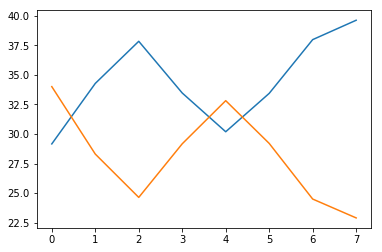

87.48272853740775

In [736]:
plt.plot(mean)
plt.plot(std)
plt.show()
u

In [523]:
np.max(mean)

44.254558823529415